In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
H = np.array([1,0])
V = np.array([0,1])

rad = lambda degrees : degrees*np.pi/180
# halfwave = lambda theta : np.array([
#         [np.cos(theta)**2-np.sin(theta)**2,  2*np.cos(theta)*np.sin(theta)    ],
#         [2*np.cos(theta)*np.sin(theta),      np.sin(theta)**2-np.cos(theta)**2]
#     ])
rotation = lambda theta : np.array([
    [np.cos(theta),  np.sin(theta) ],
    [-np.sin(theta), np.cos(theta) ]
])

halfwave = lambda theta=0 : rotation(theta) @ (np.array([
    [1, 0 ],
    [0, -1]
]) @ np.linalg.inv(rotation(theta)))

quarterwave = lambda theta=0 : rotation(theta) @ (np.array([
    [1, 0],
    [0, 1j]
]) @ np.linalg.inv(rotation(theta)))

linearPolarizer  = lambda theta=0 : rotation(theta) @ (np.array([
    [1, 0],
    [0, 0]
]) @ np.linalg.inv(rotation(theta)))

$$
\text{halfwave}(\theta) = R_\theta^{-1}\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}R_\theta, \qquad
\text{quarterwave}(\theta) = R_\theta^{-1}\begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}R_\theta
$$
## Headers
$$
\text{linearPolarizer}(\theta) = R_\theta^{-1}\begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}R_\theta 
$$

In [4]:
print(quarterwave(rad(45)))

[[ 0.5+0.5j -0.5+0.5j]
 [-0.5+0.5j  0.5+0.5j]]


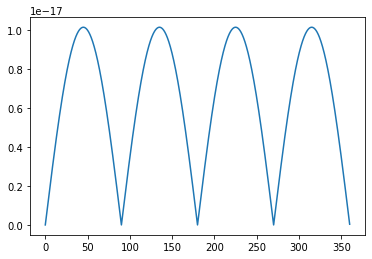

In [5]:
t=np.arange(0,360,0.1)

a = [np.linalg.norm(x_i) for x_i in [
        linearPolarizer(theta=rad(90)) @ 
        (quarterwave(theta=rad(theta)) @
        (quarterwave(theta=rad(theta)) @
        (linearPolarizer() @ 
        (halfwave(theta=rad(45))
        @ H
        ))))
    for theta in t]
]
# print(np.argmax(a)/10)
plt.plot(t,a)
plt.show()
# plt.show()
# a

Text(0.5, 0, 'Degrees of rotation of plate')

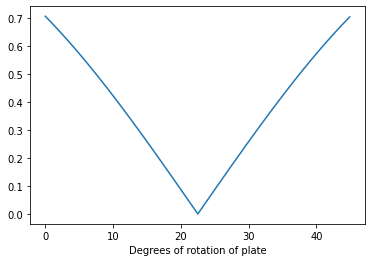

In [6]:
t = np.arange(0,45,.1)

plt.plot(t, [np.linalg.norm(x_i) for x_i in [(
    linearPolarizer()
    @ (halfwave(rad(theta))
    @ ((1/np.sqrt(2))*(H+V))
)) for theta in t]
])
plt.xlabel(r'Degrees of rotation of plate')